In [1]:
import numpy as np
import matplotlib.pylab as pl
import ot
import math
import scipy

In [2]:
def make_cube(n_samples,dim):
    n_samples=int(n_samples)
    return np.random.random((n_samples, dim)) * 2 - 1

def make_data(expe,n_samples,dim=2):
    if expe=='uniform':
        xs=make_cube(n_samples,dim)
        xt=make_cube(n_samples,dim)
    elif expe=='gaussians' :
        mu_s=np.zeros(dim)
        cov_s=np.ones(dim)
        cov_s = cov_s * np.eye(dim)
        mu_t=np.zeros(dim)
        cov_t=np.ones(dim)
        cov_t = cov_t * np.eye(dim)
        xs = np.random.multivariate_normal(mu_s, cov_s, n_samples)
        xt = np.random.multivariate_normal(mu_t, cov_t, n_samples)
    return xs,xt

In [3]:
def coefflog_approx(x,y):
    x=np.array([math.log10(s) for s in x])
    y=np.array([math.log10(s) for s in y])
    A = np.vstack([x, np.ones(x.shape[0])]).T
    y = y[:, np.newaxis]
    alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
    return alpha[0]

# Sample complexity for Gaussian distributions

In [4]:
n_seed=5 #nb of repetition of the experience

max_n=3
nb_n=20
n_l= np.logspace(2, max_n, nb_n, dtype=int)
print('nb point',n_l)

nb_dim=5
max_dim=2.1#10^
dim_l = np.logspace(.4, max_dim, nb_dim, dtype=int)
print('dim',dim_l)

res=np.zeros((n_seed,len(dim_l),len(n_l)))

nb point [ 100  112  127  143  162  183  206  233  263  297  335  379  428  483
  545  615  695  784  885 1000]
dim [  2   6  17  47 125]


In [5]:
for s in range(n_seed):
    print('seed #',s,': ',end=' ')
    for i,d in enumerate(dim_l):
        print(i,end=' ')
        for j,n in enumerate(n_l):
            xs,xt=make_data('gaussians',n,d)
            #xt,_=make_data('gaussians',n+1,d)
            res[s,i,j]=ot.emd2([],[],ot.dist(xs,xt))
    print()

seed # 0 :  0 1 2 3 4 
seed # 1 :  0 1 2 3 4 
seed # 2 :  0 1 2 3 4 
seed # 3 :  0 1 2 3 4 
seed # 4 :  0 1 2 3 4 


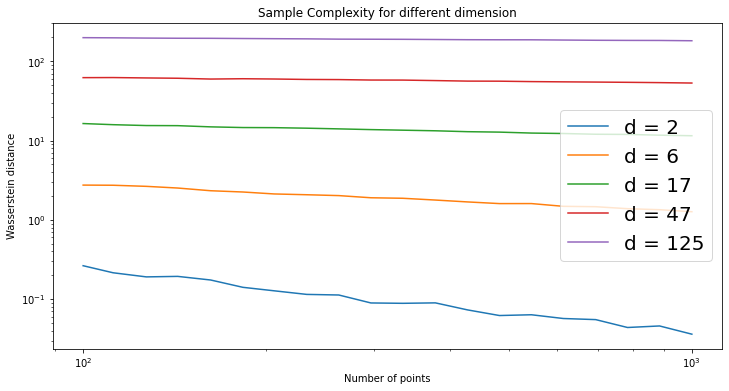

In [6]:
res_mean=np.mean(res,axis=0)
res_std = np.std(res, axis=0)

pl.figure(figsize=(12,6))
for i in range(len(dim_l)):
    pl.plot(n_l, res_mean[i,:],c='C%i'%i,label="d = %i"%dim_l[i])
    #pl.fill_between(n_l, res_mean[i,:] -  res_std[i,:], res_mean[i,:] + res_std[i,:], alpha=0.2)
pl.xscale('log')
pl.yscale('log')
pl.xlabel("Number of points")
pl.ylabel("Wasserstein distance")
pl.legend(prop={'size': 20},loc='center right')
pl.title("Sample Complexity for different dimension")

pl.show()

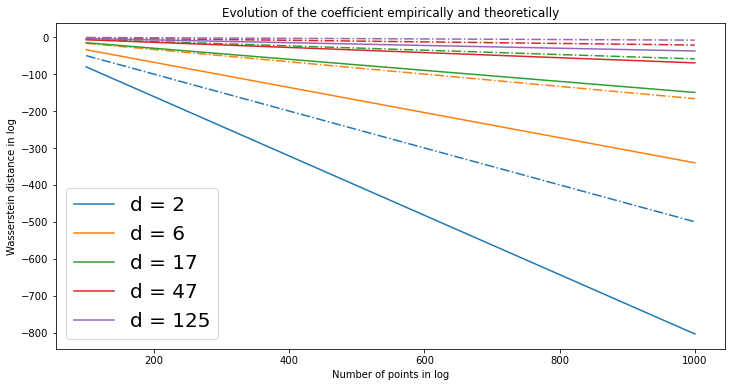

In [7]:
coeff_W=np.array([coefflog_approx(n_l,res_mean[i,:])[0] for i in range(nb_dim)])

pl.figure(figsize=(12,6))
for i,d in enumerate(dim_l):
    pl.plot(n_l, coeff_W[i]*n_l,c='C%i'%i,label="d = %i"%dim_l[i])
    #pl.plot(n_l,(-2/d)*n_l,c='C%i'%i,linestyle='--')
    pl.plot(n_l,(-1/d)*n_l,c='C%i'%i,linestyle='-.')
pl.xlabel("Number of points in log")
pl.ylabel("Wasserstein distance in log")
pl.legend(prop={'size': 20},loc='best')
pl.title("Evolution of the coefficient empirically and theoretically")
pl.show()

In [8]:
print("Empirically",coeff_W)
print("Theoretically",-2/dim_l)
print("Theoretically",-1/dim_l)

Empirically [-0.80377462 -0.34025413 -0.14970937 -0.06957555 -0.03741713]
Theoretically [-1.         -0.33333333 -0.11764706 -0.04255319 -0.016     ]
Theoretically [-0.5        -0.16666667 -0.05882353 -0.0212766  -0.008     ]


# Sample complexity for Wasserstein distance through Bures metric for Gaussians distribs

In [48]:
def W_Gauss_empiric(xs,xt):
    a,A=Cov_mean(xs)
    #print(A)
    b,B=Cov_mean(xt)
    #print(B)
    return W_Gauss(a,b,A,B)

def Cov_mean(x): #Compute the mean and covariance for Gaussian approximation
    a=np.mean(x,axis=0)
    A=np.cov((x-a).T)
    return a,A

def W_Gauss(a,b,A,B): #Compute the Wasserstein distance between Gaussian
    A_sq=scipy.linalg.sqrtm(A)
    Bures=np.trace(A+B-2*scipy.linalg.sqrtm(A_sq@B@A_sq)) #is np.real a good idea?
    return Bures+np.linalg.norm(a-b)**2


In [90]:
n_seed=5 #nb of repetition of the experience

max_n=3
nb_n=20
n_l= np.logspace(2, max_n, nb_n, dtype=int)
print('nb point',n_l)

nb_dim=5
max_dim=2.1#10^
dim_l = np.logspace(.4, max_dim, nb_dim, dtype=int)
print('dim',dim_l)

res=np.zeros((n_seed,len(dim_l),len(n_l)))

nb point [ 100  112  127  143  162  183  206  233  263  297  335  379  428  483
  545  615  695  784  885 1000]
dim [  2   6  17  47 125]


In [91]:
for s in range(n_seed):
    print('seed #',s,': ',end=' ')
    for i,d in enumerate(dim_l):
        print(i,end=' ')
        for j,n in enumerate(n_l):
            xs,xt=make_data('gaussians',n,d)
            res[s,i,j]=W_Gauss_empiric(xs,xt)
    print()

seed # 0 :  0 1 2 3 4 

/tmp/ipykernel_6900/3037470868.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  res[s,i,j]=W_Gauss_empiric(xs,xt)



seed # 1 :  0 1 2 3 4 
seed # 2 :  0 1 2 3 4 
seed # 3 :  0 1 2 3 4 
seed # 4 :  0 1 2 3 4 


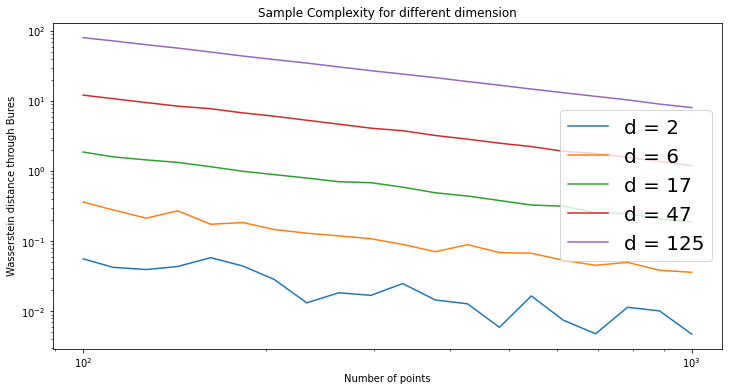

In [92]:
res_mean=np.mean(res,axis=0)
res_std = np.std(res, axis=0)

pl.figure(figsize=(12,6))
for i in range(len(dim_l)):
    pl.plot(n_l, res_mean[i,:],c='C%i'%i,label="d = %i"%dim_l[i])
    #pl.fill_between(n_l, res_mean[i,:] -  res_std[i,:], res_mean[i,:] + res_std[i,:], alpha=0.2)
pl.xscale('log')
pl.yscale('log')
pl.xlabel("Number of points")
pl.ylabel("Wasserstein distance through Bures")
pl.legend(prop={'size': 20},loc='center right')
pl.title("Sample Complexity for different dimension")

pl.show()

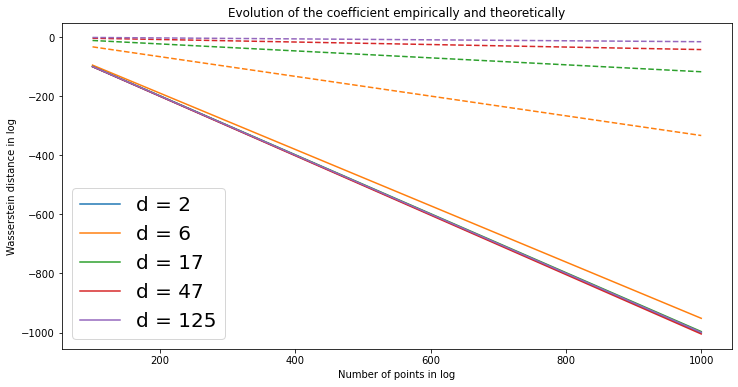

In [93]:
coeff_W=np.array([coefflog_approx(n_l,res_mean[i,:])[0] for i in range(nb_dim)])

pl.figure(figsize=(12,6))
for i,d in enumerate(dim_l):
    pl.plot(n_l, coeff_W[i]*n_l,c='C%i'%i,label="d = %i"%dim_l[i])
    pl.plot(n_l,(-2/d)*n_l,c='C%i'%i,linestyle='--')
pl.xlabel("Number of points in log")
pl.ylabel("Wasserstein distance in log")
pl.legend(prop={'size': 20},loc='best')
pl.title("Evolution of the coefficient empirically and theoretically")
pl.show()

In [53]:
print("Empirically",coeff_W)
print("Theoretically",-1/dim_l)

Empirically [-0.97641815 -0.9828434  -1.00828522 -1.00308193 -0.99801715]
Theoretically [-0.5        -0.16666667 -0.05882353 -0.0212766  -0.008     ]


# Concentration

In [86]:
n_seed=50 #nb of repetition of the experience

max_n=2.8
nb_n=30
n_l= np.logspace(2, max_n, nb_n, dtype=int)
print('nb point',n_l)

nb_dim=6
max_dim=2.1#10^
dim_l = np.logspace(.4, max_dim, nb_dim, dtype=int)
print('dim',dim_l)

res=np.zeros((n_seed,len(dim_l),len(n_l)))

nb point [100 106 113 120 128 137 146 155 166 177 188 201 214 228 243 259 276 294
 313 334 356 379 404 431 459 489 521 555 592 630]
dim [  2   5  12  26  57 125]


In [87]:
for s in range(n_seed):
    print('seed #',s,': ',end=' ')
    for i,d in enumerate(dim_l):
        print(i,end=' ')
        for j,n in enumerate(n_l):
            xs,xt=make_data('gaussians',n,d)
            res[s,i,j]=ot.emd2([],[],ot.dist(xs,xt))
    print()

seed # 0 :  0 1 2 3 4 5 
seed # 1 :  0 1 2 3 4 5 
seed # 2 :  0 1 2 3 4 5 
seed # 3 :  0 1 2 3 4 5 
seed # 4 :  0 1 2 3 4 5 
seed # 5 :  0 1 2 3 4 5 
seed # 6 :  0 1 2 3 4 5 
seed # 7 :  0 1 2 3 4 5 
seed # 8 :  0 1 2 3 4 5 
seed # 9 :  0 1 2 3 4 5 
seed # 10 :  0 1 2 3 4 5 
seed # 11 :  0 1 2 3 4 5 
seed # 12 :  0 1 2 3 4 5 
seed # 13 :  0 1 2 3 4 5 
seed # 14 :  0 1 2 3 4 5 
seed # 15 :  0 1 2 3 4 5 
seed # 16 :  0 1 2 3 4 5 
seed # 17 :  0 1 2 3 4 5 
seed # 18 :  0 1 2 3 4 5 
seed # 19 :  0 1 2 3 4 5 
seed # 20 :  0 1 2 3 4 5 
seed # 21 :  0 1 2 3 4 5 
seed # 22 :  0 1 2 3 4 5 
seed # 23 :  0 1 2 3 4 5 
seed # 24 :  0 1 2 3 4 5 
seed # 25 :  0 1 2 3 4 5 
seed # 26 :  0 1 2 3 4 5 
seed # 27 :  0 1 2 3 4 5 
seed # 28 :  0 1 2 3 4 5 
seed # 29 :  0 1 2 3 4 5 
seed # 30 :  0 1 2 3 4 5 
seed # 31 :  0 1 2 3 4 5 
seed # 32 :  0 1 2 3 4 5 
seed # 33 :  0 1 2 3 4 5 
seed # 34 :  0 1 2 3 4 5 
seed # 35 :  0 1 2 3 4 5 
seed # 36 :  0 1 2 3 4 5 
seed # 37 :  0 1 2 3 4 5 
seed # 38 :  0 1 2 3 4

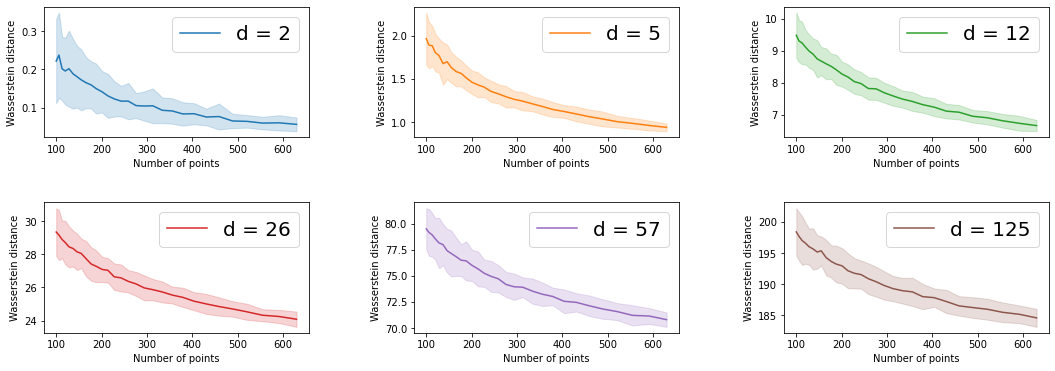

In [88]:
res_mean=np.mean(res,axis=0)
res_std = np.std(res, axis=0)

pl.figure(figsize=(18,6))
grid = pl.GridSpec(2, 3, wspace=0.4, hspace=0.5)
pl.title("Sample Complexity for different dimension")
for i in range(len(dim_l)):
    pl.subplot(grid[i//3,i%3])
    pl.plot(n_l, res_mean[i,:],c='C%i'%i,label="d = %i"%dim_l[i])
    pl.fill_between(n_l, res_mean[i,:] -  2*res_std[i,:], res_mean[i,:] + 2*res_std[i,:], alpha=0.2,color='C%i'%i)
    pl.legend(prop={'size': 20},loc='best')
    #pl.xscale('log')
    #pl.yscale('log')
    pl.xlabel("Number of points")
    pl.ylabel("Wasserstein distance")


pl.show()